In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
import os
from fpdf import FPDF
from PIL import Image
from natsort import natsorted
sns.set_theme()
##df_drop.reset_index('Period',inplace=True)

## Reading and cleaning the data

In [2]:
df= pd.read_csv('data.csv')
df.head()

,IndicatorCode,Indicator,ValueType,ParentLocationCode,ParentLocation,Location type,SpatialDimValueCode,Location,Period type,Period,...,FactValueUoM,FactValueNumericLowPrefix,FactValueNumericLow,FactValueNumericHighPrefix,FactValueNumericHigh,Value,FactValueTranslationID,FactComments,Language,DateModified
0,SDGPM25,Concentrations of fine particulate matter (PM2.5),text,AFR,Africa,Country,KEN,Kenya,Year,2019,...,NaN,NaN,6.29,NaN,13.74,10.01 [6.29-13.74],NaN,NaN,EN,2022-08-12 00:00:00
1,SDGPM25,Concentrations of fine particulate matter (PM2.5),text,AMR,Americas,Country,TTO,Trinidad and Tobago,Year,2019,...,NaN,NaN,7.44,NaN,12.55,10.02 [7.44-12.55],NaN,NaN,EN,2022-08-12 00:00:00
2,SDGPM25,Concentrations of fine particulate matter (PM2.5),text,EUR,Europe,Country,GBR,United Kingdom of Great Britain and Northern I...,Year,2019,...,NaN,NaN,9.73,NaN,10.39,10.06 [9.73-10.39],NaN,NaN,EN,2022-08-12 00:00:00
3,SDGPM25,Concentrations of fine particulate matter (PM2.5),text,AMR,Americas,Country,GRD,Grenada,Year,2019,...,NaN,NaN,7.07,NaN,13.20,10.08 [7.07-13.20],NaN,NaN,EN,2022-08-12 00:00:00
4,SDGPM25,Concentrations of fine particulate matter (PM2.5),text,AMR,Americas,Country,BRA,Brazil,Year,2019,...,NaN,NaN,8.23,NaN,12.46,10.09 [8.23-12.46],NaN,NaN,EN,2022-08-12 00:00:00


In [3]:
df.describe()

,Period,Dim2 type,Dim2,Dim2ValueCode,Dim3 type,Dim3,Dim3ValueCode,DataSourceDimValueCode,DataSource,FactValueNumericPrefix,FactValueNumeric,FactValueUoM,FactValueNumericLowPrefix,FactValueNumericLow,FactValueNumericHighPrefix,FactValueNumericHigh,FactValueTranslationID,FactComments
count,9450.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9450.000000,0.0,0.0,9450.000000,0.0,9450.000000,0.0,0.0
mean,2014.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.538435,NaN,NaN,16.229705,NaN,35.475423,NaN,NaN
std,2.872433,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.024029,NaN,NaN,11.174679,NaN,27.150003,NaN,NaN
min,2010.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.590000,NaN,NaN,1.410000,NaN,5.260000,NaN,NaN
25%,2012.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.920000,NaN,NaN,7.850000,NaN,15.950000,NaN,NaN
50%,2014.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.570000,NaN,NaN,13.790000,NaN,24.480000,NaN,NaN
75%,2017.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.977500,NaN,NaN,20.340000,NaN,49.687500,NaN,NaN
max,2019.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.490000,NaN,NaN,70.240000,NaN,175.600000,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9450 entries, 0 to 9449
Data columns (total 34 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   IndicatorCode               9450 non-null   object 
 1   Indicator                   9450 non-null   object 
 2   ValueType                   9450 non-null   object 
 3   ParentLocationCode          9450 non-null   object 
 4   ParentLocation              9450 non-null   object 
 5   Location type               9450 non-null   object 
 6   SpatialDimValueCode         9450 non-null   object 
 7   Location                    9450 non-null   object 
 8   Period type                 9450 non-null   object 
 9   Period                      9450 non-null   int64  
 10  IsLatestYear                9450 non-null   bool   
 11  Dim1 type                   9450 non-null   object 
 12  Dim1                        9450 non-null   object 
 13  Dim1ValueCode               9450 

### cleaning 

In [5]:
df_drop = df.dropna(axis=1)

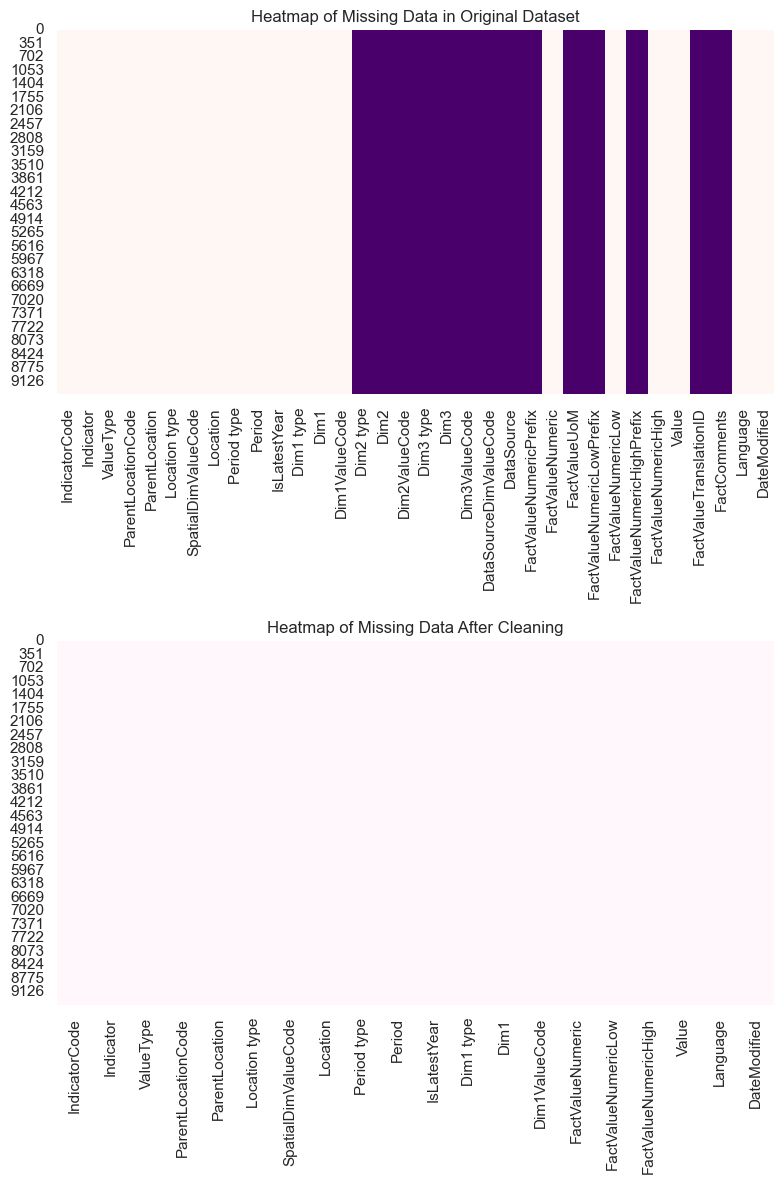

Missing values in columns after data cleaning: 
IndicatorCode           0
Indicator               0
ValueType               0
ParentLocationCode      0
ParentLocation          0
Location type           0
SpatialDimValueCode     0
Location                0
Period type             0
Period                  0
IsLatestYear            0
Dim1 type               0
Dim1                    0
Dim1ValueCode           0
FactValueNumeric        0
FactValueNumericLow     0
FactValueNumericHigh    0
Value                   0
Language                0
DateModified            0
dtype: int64


In [6]:
plt.figure(figsize=(8, 12)) 
plt.subplot(2,1,1)
sns.heatmap(df.isnull(), cbar=False, cmap='RdPu')
plt.title('Heatmap of Missing Data in Original Dataset')

plt.subplot(2,1,2)
sns.heatmap(df_drop.isnull(), cbar=False, cmap='PuBuGn')
plt.title('Heatmap of Missing Data After Cleaning')
plt.tight_layout()
plt.savefig('01 heatmap_missing_data_cleaned.png')
plt.show()

# Print missing values after dropping rows
print("Missing values in columns after data cleaning: ")
print(df_drop.isnull().sum())


In [7]:
df_drop.to_csv('Cleaned_Data.csv',index=False)

In [8]:
df_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9450 entries, 0 to 9449
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   IndicatorCode         9450 non-null   object 
 1   Indicator             9450 non-null   object 
 2   ValueType             9450 non-null   object 
 3   ParentLocationCode    9450 non-null   object 
 4   ParentLocation        9450 non-null   object 
 5   Location type         9450 non-null   object 
 6   SpatialDimValueCode   9450 non-null   object 
 7   Location              9450 non-null   object 
 8   Period type           9450 non-null   object 
 9   Period                9450 non-null   int64  
 10  IsLatestYear          9450 non-null   bool   
 11  Dim1 type             9450 non-null   object 
 12  Dim1                  9450 non-null   object 
 13  Dim1ValueCode         9450 non-null   object 
 14  FactValueNumeric      9450 non-null   float64
 15  FactValueNumericLow  

In [9]:
df_drop

,IndicatorCode,Indicator,ValueType,ParentLocationCode,ParentLocation,Location type,SpatialDimValueCode,Location,Period type,Period,IsLatestYear,Dim1 type,Dim1,Dim1ValueCode,FactValueNumeric,FactValueNumericLow,FactValueNumericHigh,Value,Language,DateModified
0,SDGPM25,Concentrations of fine particulate matter (PM2.5),text,AFR,Africa,Country,KEN,Kenya,Year,2019,True,Residence Area Type,Cities,RESIDENCEAREATYPE_CITY,10.01,6.29,13.74,10.01 [6.29-13.74],EN,2022-08-12 00:00:00
1,SDGPM25,Concentrations of fine particulate matter (PM2.5),text,AMR,Americas,Country,TTO,Trinidad and Tobago,Year,2019,True,Residence Area Type,Rural,RESIDENCEAREATYPE_RUR,10.02,7.44,12.55,10.02 [7.44-12.55],EN,2022-08-12 00:00:00
2,SDGPM25,Concentrations of fine particulate matter (PM2.5),text,EUR,Europe,Country,GBR,United Kingdom of Great Britain and Northern I...,Year,2019,True,Residence Area Type,Cities,RESIDENCEAREATYPE_CITY,10.06,9.73,10.39,10.06 [9.73-10.39],EN,2022-08-12 00:00:00
3,SDGPM25,Concentrations of fine particulate matter (PM2.5),text,AMR,Americas,Country,GRD,Grenada,Year,2019,True,Residence Area Type,Total,RESIDENCEAREATYPE_TOTL,10.08,7.07,13.20,10.08 [7.07-13.20],EN,2022-08-12 00:00:00
4,SDGPM25,Concentrations of fine particulate matter (PM2.5),text,AMR,Americas,Country,BRA,Brazil,Year,2019,True,Residence Area Type,Towns,RESIDENCEAREATYPE_TOWN,10.09,8.23,12.46,10.09 [8.23-12.46],EN,2022-08-12 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9445,SDGPM25,Concentrations of fine particulate matter (PM2.5),text,AMR,Americas,Country,BLZ,Belize,Year,2010,False,Residence Area Type,Cities,RESIDENCEAREATYPE_CITY,9.92,3.91,20.28,9.92 [3.91-20.28],EN,2022-08-12 00:00:00
9446,SDGPM25,Concentrations of fine particulate matter (PM2.5),text,AMR,Americas,Country,TTO,Trinidad and Tobago,Year,2010,False,Residence Area Type,Cities,RESIDENCEAREATYPE_CITY,9.92,7.80,12.89,9.92 [7.80-12.89],EN,2022-08-12 00:00:00
9447,SDGPM25,Concentrations of fine particulate matter (PM2.5),text,AFR,Africa,Country,KEN,Kenya,Year,2010,False,Residence Area Type,Cities,RESIDENCEAREATYPE_CITY,9.94,6.30,13.57,9.94 [6.30-13.57],EN,2022-08-12 00:00:00
9448,SDGPM25,Concentrations of fine particulate matter (PM2.5),text,AMR,Americas,Country,USA,United States of America,Year,2010,False,Residence Area Type,Cities,RESIDENCEAREATYPE_CITY,9.95,9.78,10.11,9.95 [9.78-10.11],EN,2022-08-12 00:00:00


#### extra EDA

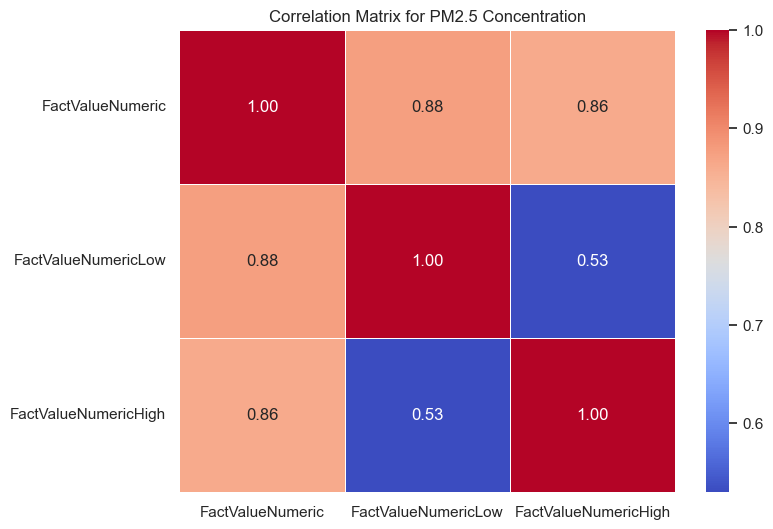

In [10]:
## Correlation matrix for numeric columns
correlation_matrix = df[['FactValueNumeric', 'FactValueNumericLow', 'FactValueNumericHigh']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix for PM2.5 Concentration')
plt.show()

### Calculate average numeric value by year


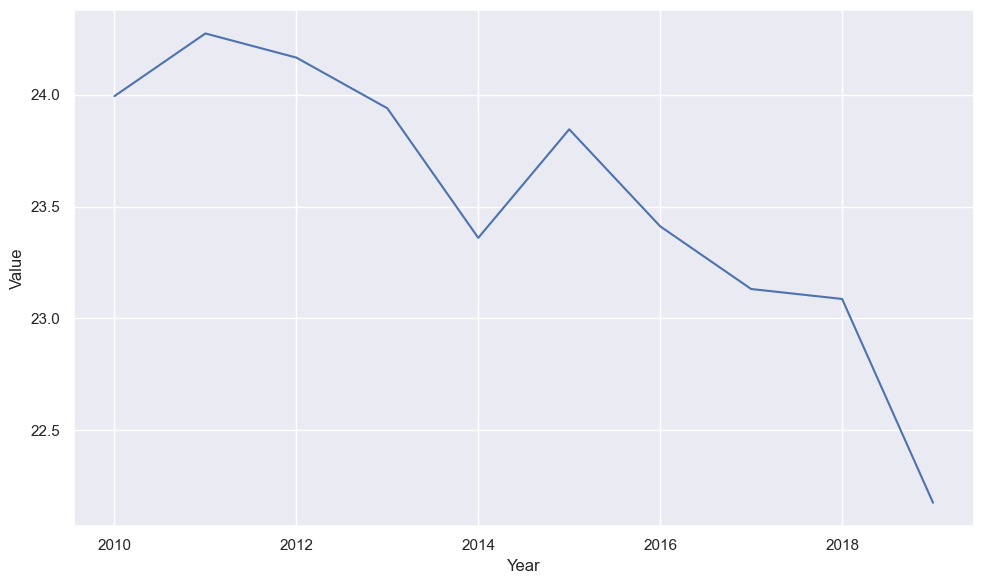

In [16]:
# Calculate average numeric value by year
avg_by_year = df_drop.groupby('Period')['FactValueNumeric'].mean()
plt.figure(figsize=(10,6))
plt.plot(avg_by_year)
plt.xlabel('Year')
plt.ylabel('Value')
plt.tight_layout()
plt.savefig('02 avg_by_year.png')
plt.show()

## Plots of the Dimensions in Dataset


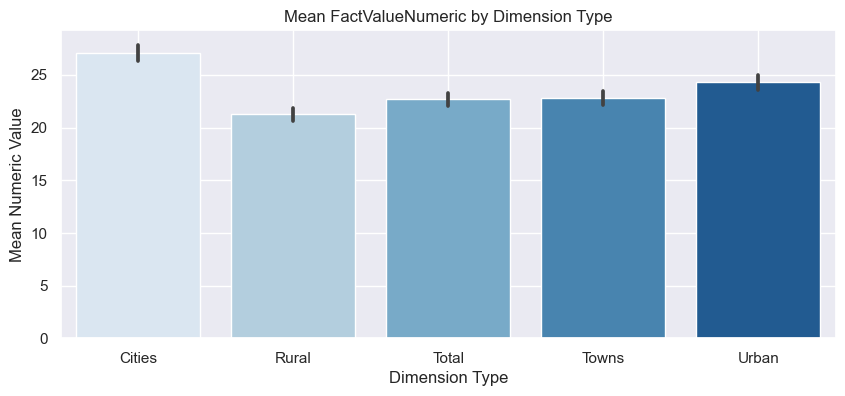

In [17]:

plt.figure(figsize=(10 ,4))
sns.barplot(x= 'Dim1', y='FactValueNumeric', data=df_drop,palette='Blues')
plt.title('Mean FactValueNumeric by Dimension Type')
plt.xlabel('Dimension Type')
plt.ylabel('Mean Numeric Value')
plt.tight_layout
plt.grid(True)
plt.savefig('03 mean_factvalue_numeric_by_dimension_type.png')
plt.show()

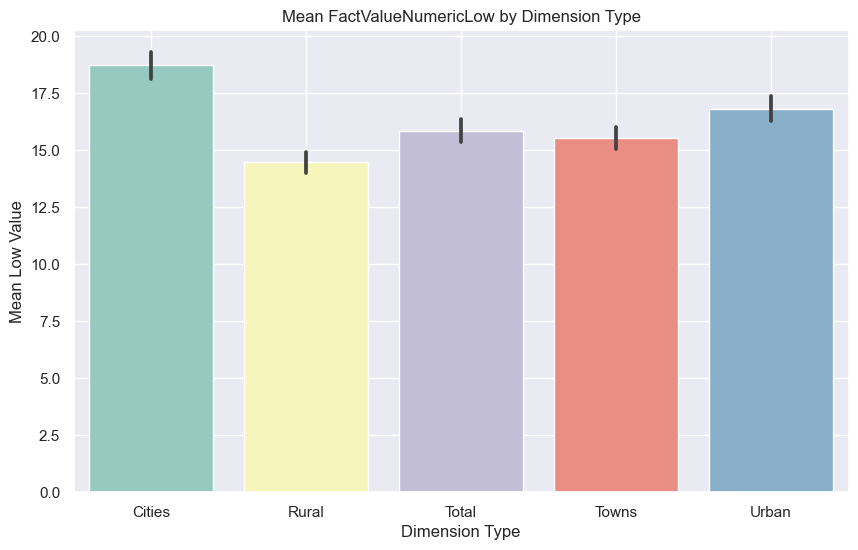

In [18]:

plt.figure(figsize=(10 ,6))
sns.barplot(x= 'Dim1', y='FactValueNumericLow', data=df_drop, palette='Set3')
plt.title('Mean FactValueNumericLow by Dimension Type')
plt.xlabel('Dimension Type')
plt.ylabel('Mean Low Value')
plt.tight_layout
plt.grid(True)
plt.savefig('04 mean_factvalue_numericlow_by_dimension_type.png')
plt.show()

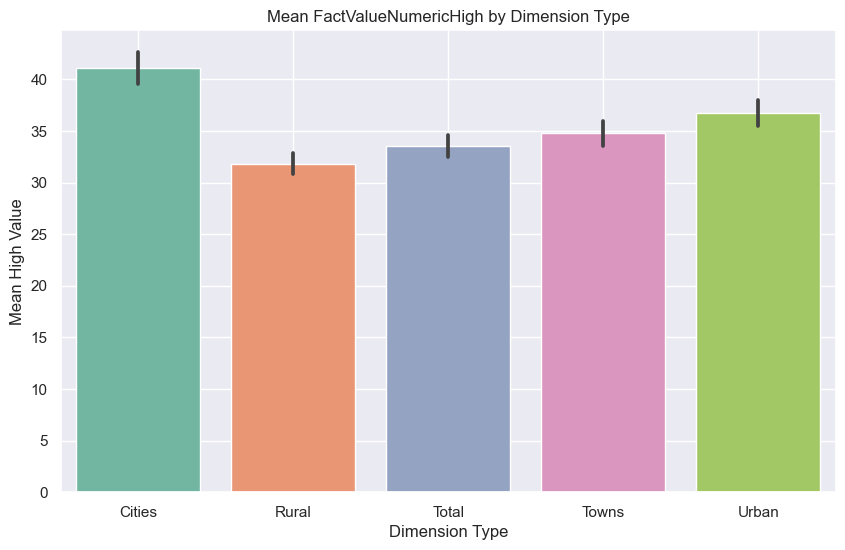

In [19]:
plt.figure(figsize=(10 ,6))
sns.barplot(x= 'Dim1', y='FactValueNumericHigh', data=df_drop, palette='Set2')
plt.title('Mean FactValueNumericHigh by Dimension Type')
plt.xlabel('Dimension Type')
plt.ylabel('Mean High Value')
plt.tight_layout
plt.grid(True)
plt.savefig('05 mean_factvalue_numerichigh_by_dimension_type.png')
plt.show()

## Parent Location Analysis


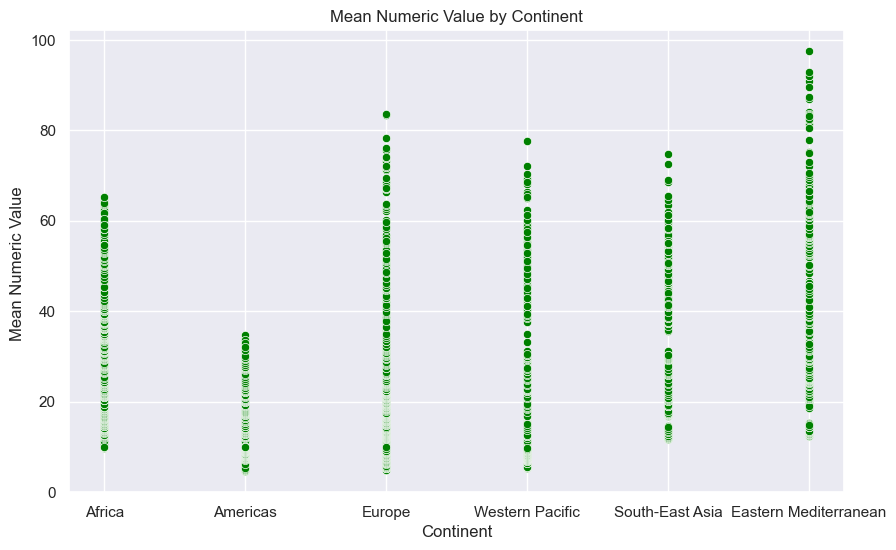

In [20]:
plt.figure(figsize=(10 ,6))
sns.scatterplot(x= 'ParentLocation', y='FactValueNumeric', data=df_drop, color="green")
plt.title('Mean Numeric Value by Continent')
plt.xlabel('Continent')
plt.ylabel('Mean Numeric Value ')
plt.tight_layout
plt.grid(True)
plt.savefig('06 mean_numeric_value_by_continent.png')
plt.show()

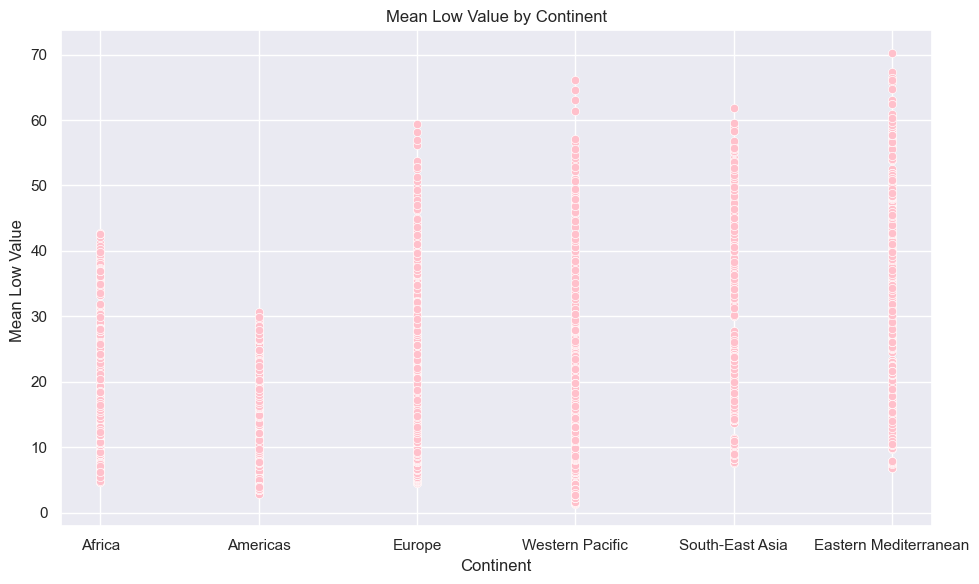

In [21]:
plt.figure(figsize=(10 ,6))
sns.scatterplot(x= 'ParentLocation', y='FactValueNumericLow', data=df_drop, color='pink')
plt.title('Mean Low Value by Continent')
plt.xlabel('Continent')
plt.ylabel('Mean Low Value ')
plt.tight_layout()
plt.grid(True)
plt.savefig('07 mean_low_value_by_continent.png')
plt.show()

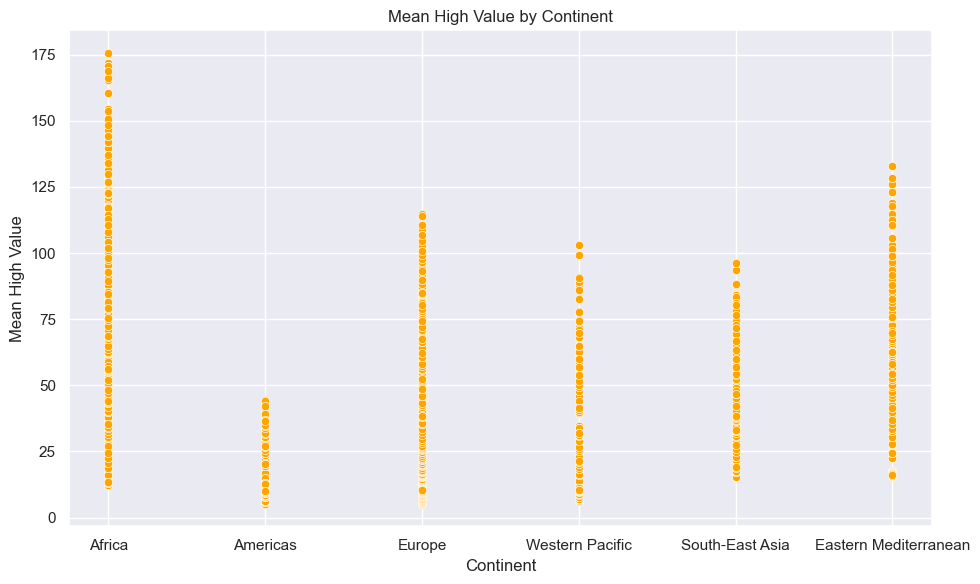

In [22]:
plt.figure(figsize=(10 ,6))
sns.scatterplot(x= 'ParentLocation', y='FactValueNumericHigh', data=df_drop, color='Orange')
plt.title('Mean High Value by Continent')
plt.xlabel('Continent')
plt.ylabel('Mean High Value')
plt.tight_layout()
plt.grid(True)
plt.savefig('08 mean_high_value_by_continent.png')
plt.show()

## Location-Specific Plots



###### Numeric

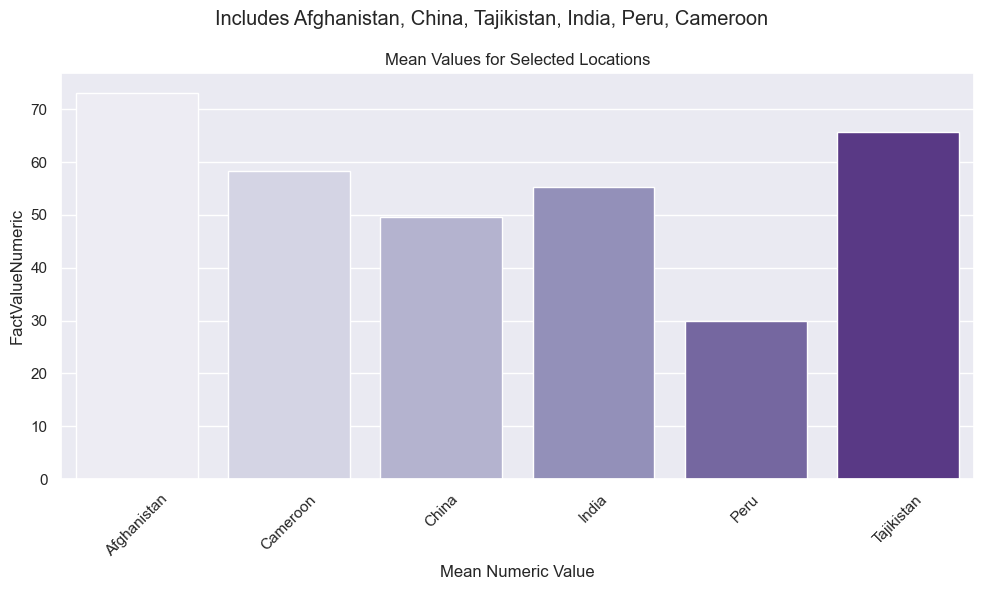

In [23]:
# Aggregate values for a specific location 
agg_data = df_drop.groupby(['Location'])['FactValueNumeric'].mean()
agg_reset=agg_data.reset_index()
# Filter for specific locations to avoid clutter
filtered_data = agg_reset[agg_reset['Location'].isin(['Afghanistan', 'China', 'Tajikistan','India','Peru','Cameroon'])]

plt.figure(figsize=(10 ,6))
sns.barplot(data=filtered_data, x='Location',y='FactValueNumeric',palette='Purples')
plt.title('Mean Values for Selected Locations')
plt.suptitle('Includes Afghanistan, China, Tajikistan, India, Peru, Cameroon')
plt.xlabel('Location')
plt.xlabel('Mean Numeric Value')
plt.xticks(rotation=45, ha='center')
plt.tight_layout()
plt.savefig('09 mean_values_for_selected_locations.png')
plt.show()

###### Low

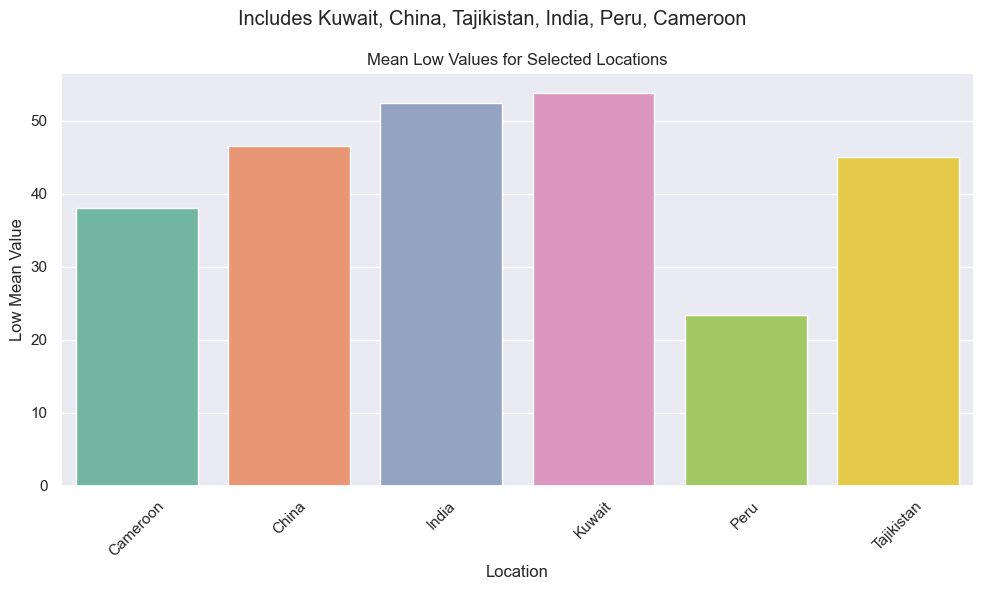

In [24]:
# Aggregate values for a specific location and indicator
agg_data_low = df_drop.groupby(['Location'])['FactValueNumericLow'].mean()
agg_reset_Low=agg_data_low.reset_index()
# Filter for specific locations to avoid clutter
filtered_data_l = agg_reset_Low[agg_reset_Low['Location'].isin(['Kuwait', 'China', 'Tajikistan','India','Peru','Cameroon'])]

plt.figure(figsize=(10 ,6))
sns.barplot(data=filtered_data_l, x='Location',y='FactValueNumericLow',palette='Set2')
plt.title('Mean Low Values for Selected Locations')
plt.suptitle('Includes Kuwait, China, Tajikistan, India, Peru, Cameroon')
plt.xlabel('Location')
plt.ylabel('Low Mean Value')
plt.xticks(rotation=45, ha='center')
plt.tight_layout()
plt.savefig('10 mean_low_values_for_selected_locations.png')
plt.show()

###### High

C:\Users\marya\AppData\Local\Temp\ipykernel_9180\1192438307.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data_h['Location'] = filtered_data_h['Location'].replace({


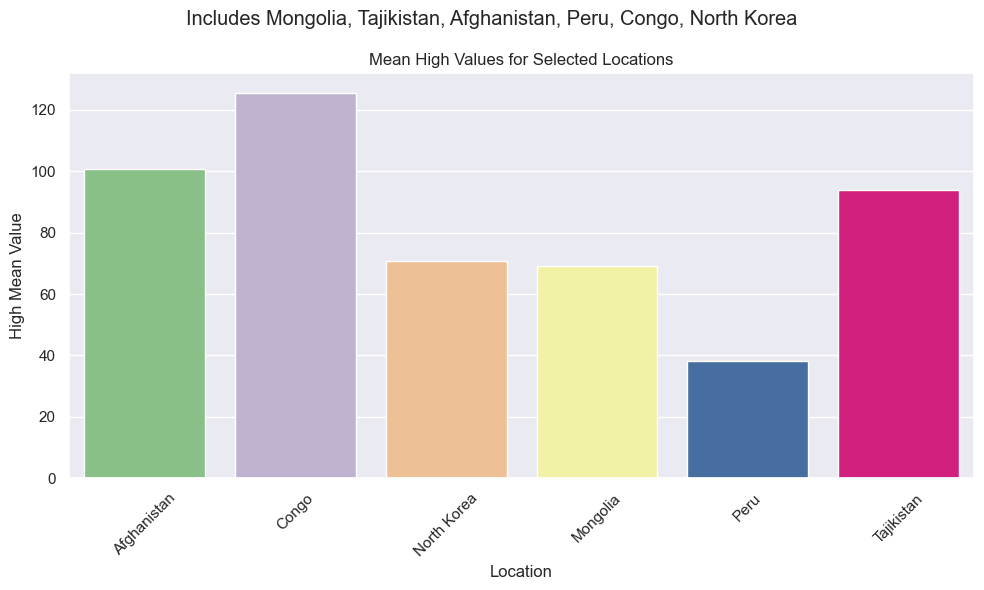

In [25]:
# Aggregate values for a specific location and indicator
agg_data_high = df_drop.groupby(['Location'])['FactValueNumericHigh'].mean()
agg_reset_High=agg_data_high.reset_index()

# Filter for specific locations to avoid clutter
filtered_data_h = agg_reset_High[agg_reset_High['Location'].isin(['Mongolia','Tajikistan','Afghanistan','Peru','Congo',"Democratic People's Republic of Korea"])]
# Replace long location names with shorter ones
filtered_data_h['Location'] = filtered_data_h['Location'].replace({
    "Democratic People's Republic of Korea": "North Korea"
})
plt.figure(figsize=(10 ,6))
sns.barplot(data=filtered_data_h, x='Location',y='FactValueNumericHigh',palette='Accent')
plt.title('Mean High Values for Selected Locations')
plt.suptitle('Includes Mongolia, Tajikistan, Afghanistan, Peru, Congo, North Korea')
plt.xlabel('Location')
plt.ylabel('High Mean Value')
plt.xticks(rotation=45, ha='center')
plt.tight_layout()
plt.savefig('11 mean_high_values_for_selected_locations.png')
plt.show()

### Forcasting the Air pollution quality for the future

In [26]:
df_plf=df_drop[['Period','Location','FactValueNumeric']]
df_plf

,Period,Location,FactValueNumeric
0,2019,Kenya,10.01
1,2019,Trinidad and Tobago,10.02
2,2019,United Kingdom of Great Britain and Northern I...,10.06
3,2019,Grenada,10.08
4,2019,Brazil,10.09
...,...,...,...
9445,2010,Belize,9.92
9446,2010,Trinidad and Tobago,9.92
9447,2010,Kenya,9.94
9448,2010,United States of America,9.95


Slope:-0.1875
R-squared:0.7902


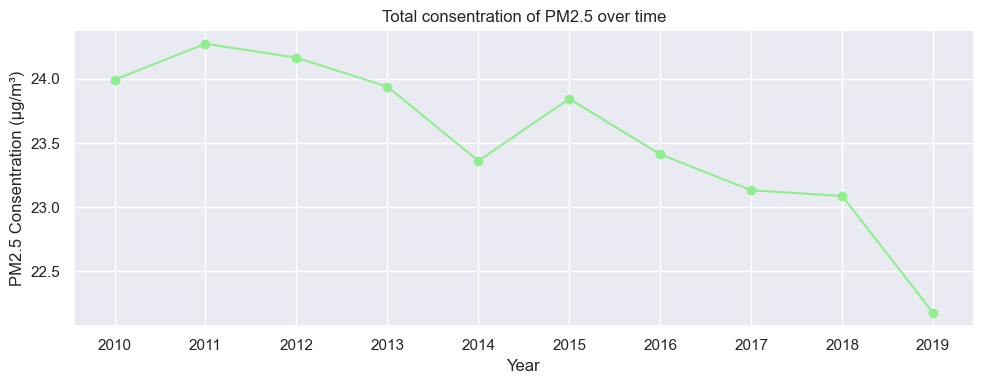

In [27]:
df_global=df_plf.groupby('Period')['FactValueNumeric'].mean().reset_index()
#print(df_global.head())

slope, intercept,r_value,p_value, std_err=linregress(df_global['Period'],df_global['FactValueNumeric'])
print(f"Slope:{slope:.4f}")
print(f"R-squared:{r_value**2:.4f}")

df_global['Period']=pd.to_datetime(df_global['Period'],format='%Y')
df_global.set_index('Period',inplace=True)
#print(df_global.head())

plt.figure(figsize=(10 ,4))
plt.plot(df_global, marker='o',color='lightgreen')
plt.title('Total consentration of PM2.5 over time')
plt.xlabel('Year')
plt.ylabel('PM2.5 Consentration (µg/m³)')
plt.grid(True)
plt.tight_layout()
plt.savefig('13 pm25_over_time.png')
plt.show()

In [28]:
result= adfuller(df_global)
print('ADF Statistic:', result[0])
print('P-value:', result[1])
if result[1] > 0.05:
    print("Series is non-stationary and requires differencing.")
else:
    print("Series is stationary and ready for modeling.")

ADF Statistic: 0.8157546431358776
P-value: 0.9918862678411197
Series is non-stationary and requires differencing.


In [29]:
df_global_diff=df_global.diff().dropna()
result_= adfuller(df_global_diff)
print('ADF Statistic:', result_[0])
print('P-value:', result_[1])
if result_[1] > 0.05:
    print("Series is non-stationary and requires differencing.")
else:
    print("Series is stationary and ready for modeling.")

ADF Statistic: -3.4648941622606655
P-value: 0.008935809152868233
Series is stationary and ready for modeling.


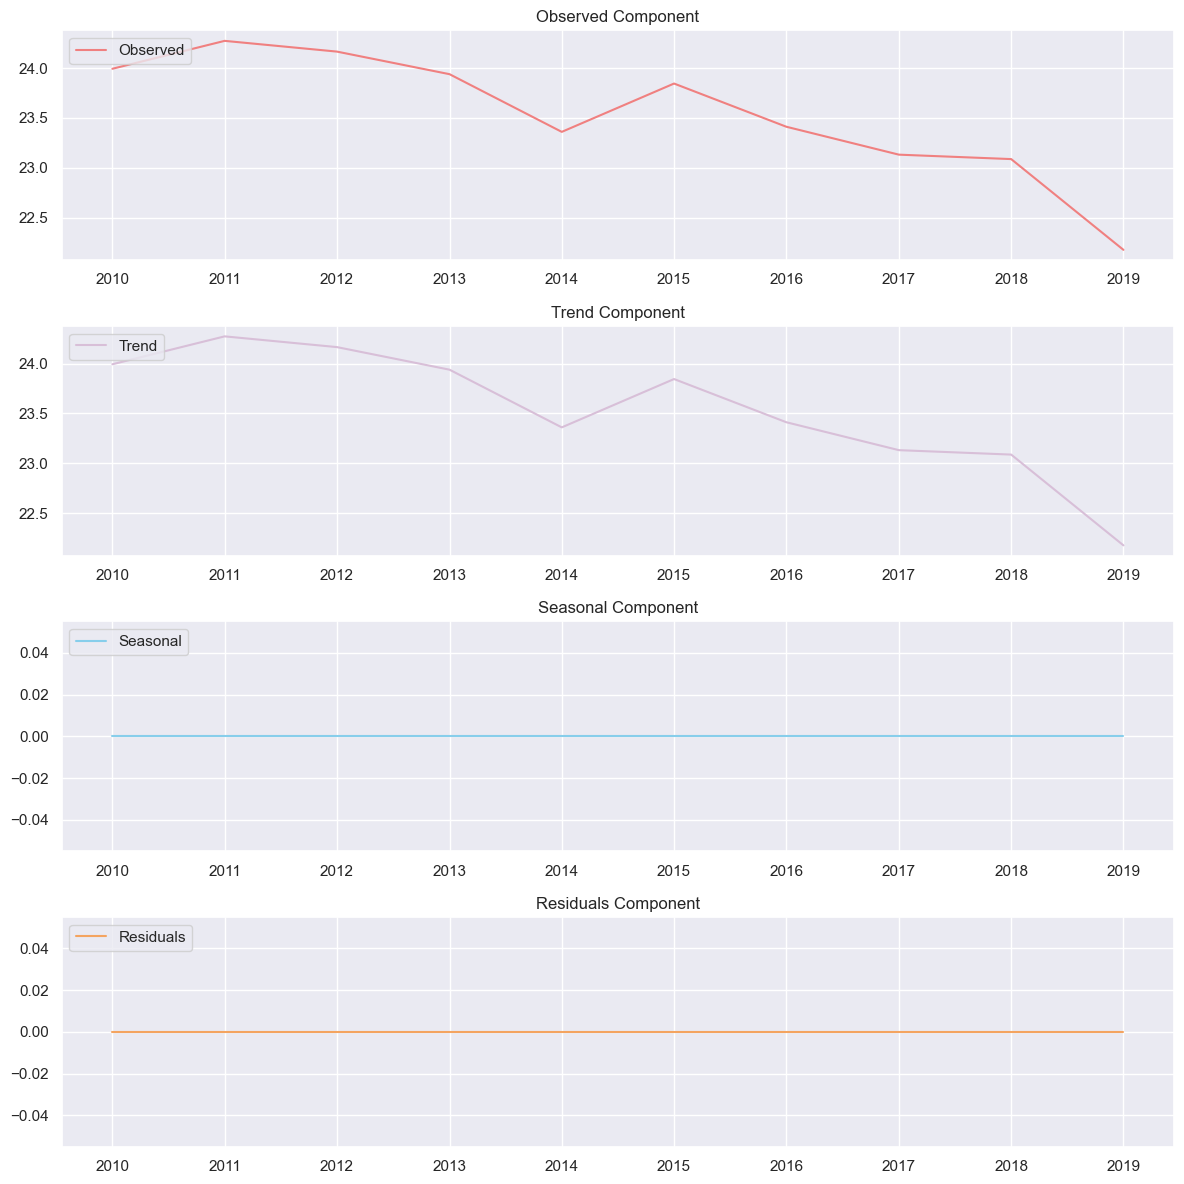

In [30]:
decomposition = seasonal_decompose(df_global, model='additive', period=1)
plt.figure(figsize=(12, 12))
for i, (data, label, color) in enumerate(zip([decomposition.observed, decomposition.trend, decomposition.seasonal, decomposition.resid],
                                             ['Observed', 'Trend', 'Seasonal', 'Residuals'],
                                             ['#F08080', '#D8BFD8', '#87CEEB', '#F4A460'])):
    plt.subplot(4, 1, i + 1)
    plt.plot(data, color=color, label=label)
    plt.title(f'{label} Component') 
    plt.legend(loc='upper left')
plt.tight_layout()
plt.savefig('12 seasonal_decomposition_numeric.png')
plt.show()



In [31]:
seasonal_comp= decomposition.seasonal
print("seasonal_comp: ", seasonal_comp )


seasonal_comp:  Period
2010-01-01    0.0
2011-01-01    0.0
2012-01-01    0.0
2013-01-01    0.0
2014-01-01    0.0
2015-01-01    0.0
2016-01-01    0.0
2017-01-01    0.0
2018-01-01    0.0
2019-01-01    0.0
Name: seasonal, dtype: float64


In [32]:
df_global_diff.head(10)

,FactValueNumeric
Period,
2011-01-01,0.280180
2012-01-01,-0.107799
2013-01-01,-0.226603
2014-01-01,-0.579206
2015-01-01,0.485164
2016-01-01,-0.433608
2017-01-01,-0.280243
2018-01-01,-0.044455
2019-01-01,-0.911143


In [33]:
df_global.head()

,FactValueNumeric
Period,
2010-01-01,23.993598
2011-01-01,24.273778
2012-01-01,24.165979
2013-01-01,23.939376
2014-01-01,23.360169


##### Using the orignal data before differencing

Mean Squared Error: 11.0902


c:\Users\marya\anacon\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\marya\anacon\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


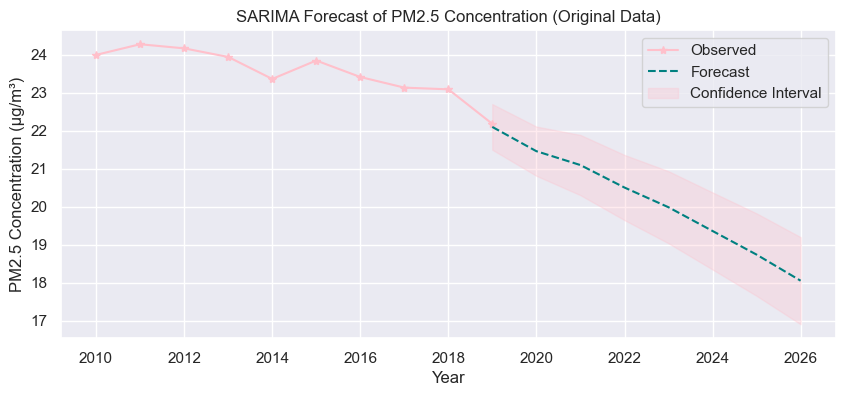

In [34]:

# Fit the SARIMA model without seasonal order
sarima_model = SARIMAX(df_global, order=(1, 1, 0), seasonal_order=(0, 0, 0, 0), trend='t', enforce_stationarity=False, enforce_invertibility=False).fit()
# Forecast the next  years
forecast = sarima_model.get_forecast(steps=8)
forecast_index = pd.date_range(start=df_global.index[-3] + pd.DateOffset(years=1), periods=8, freq='Y')
forecast_values = forecast.predicted_mean
forecast_ci = forecast.conf_int()

actual_values = df_global[-8:]
mse = mean_squared_error(actual_values, forecast_values)
print(f"Mean Squared Error: {mse:.4f}")


# Plot the observed data, forecast, and confidence intervals
plt.figure(figsize=(10, 4))
plt.plot(df_global, label='Observed', color='pink', marker='*')
plt.plot(forecast_index, forecast_values, label='Forecast', color='teal', linestyle='--')
plt.fill_between(forecast_index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='pink', alpha=0.3, label='Confidence Interval')
plt.title('SARIMA Forecast of PM2.5 Concentration (Original Data)')
plt.xlabel('Year')
plt.ylabel('PM2.5 Concentration (µg/m³)')
plt.legend()
plt.grid(True)
plt.savefig('14 sarima_forecast_pm25_global.png')
plt.show()

##### Using the difference table


c:\Users\marya\anacon\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\marya\anacon\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


Mean Squared Error: 620.5205


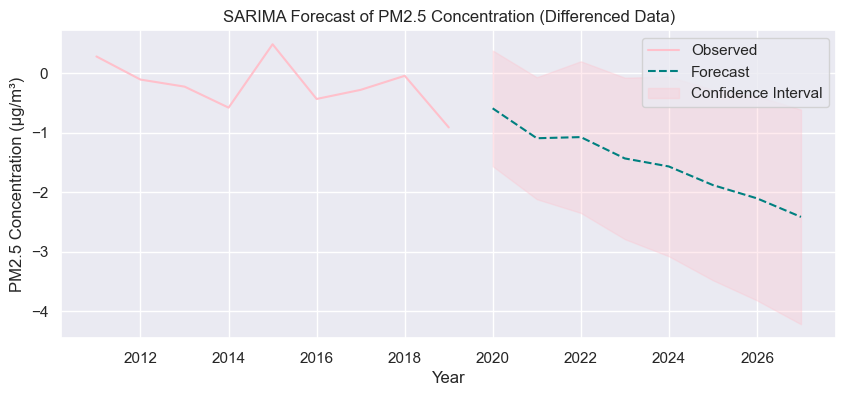

In [35]:
# Fit the SARIMA model without seasonal order
sarima_model = SARIMAX(df_global_diff, order=(1, 1, 0), seasonal_order=(0, 0, 0, 0), trend='t', enforce_stationarity=False, enforce_invertibility=False).fit()
# Forecast the next  years
forecast = sarima_model.get_forecast(steps=8)
forecast_index = pd.date_range(start=df_global_diff.index[-2] + pd.DateOffset(years=1), periods=8, freq='Y')
forecast_values = forecast.predicted_mean
forecast_ci = forecast.conf_int()

actual_values = df_global[-8:]
mse = mean_squared_error(actual_values, forecast_values)
print(f"Mean Squared Error: {mse:.4f}")

# Plot the observed data, forecast, and confidence intervals
plt.figure(figsize=(10, 4))
plt.plot(df_global_diff, label='Observed', color='pink')
plt.plot(forecast_index, forecast_values, label='Forecast', color='teal', linestyle='--')
plt.fill_between(forecast_index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='pink', alpha=0.3, label='Confidence Interval')
plt.title('SARIMA Forecast of PM2.5 Concentration (Differenced Data)')
plt.xlabel('Year')
plt.ylabel('PM2.5 Concentration (µg/m³)')
plt.legend()
plt.grid(True)
plt.savefig('15 sarima_forecast_pm25_global_diff.png')
plt.show()


In [36]:
df_global.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10 entries, 2010-01-01 to 2019-01-01
Data columns (total 1 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   FactValueNumeric  10 non-null     float64
dtypes: float64(1)
memory usage: 160.0 bytes


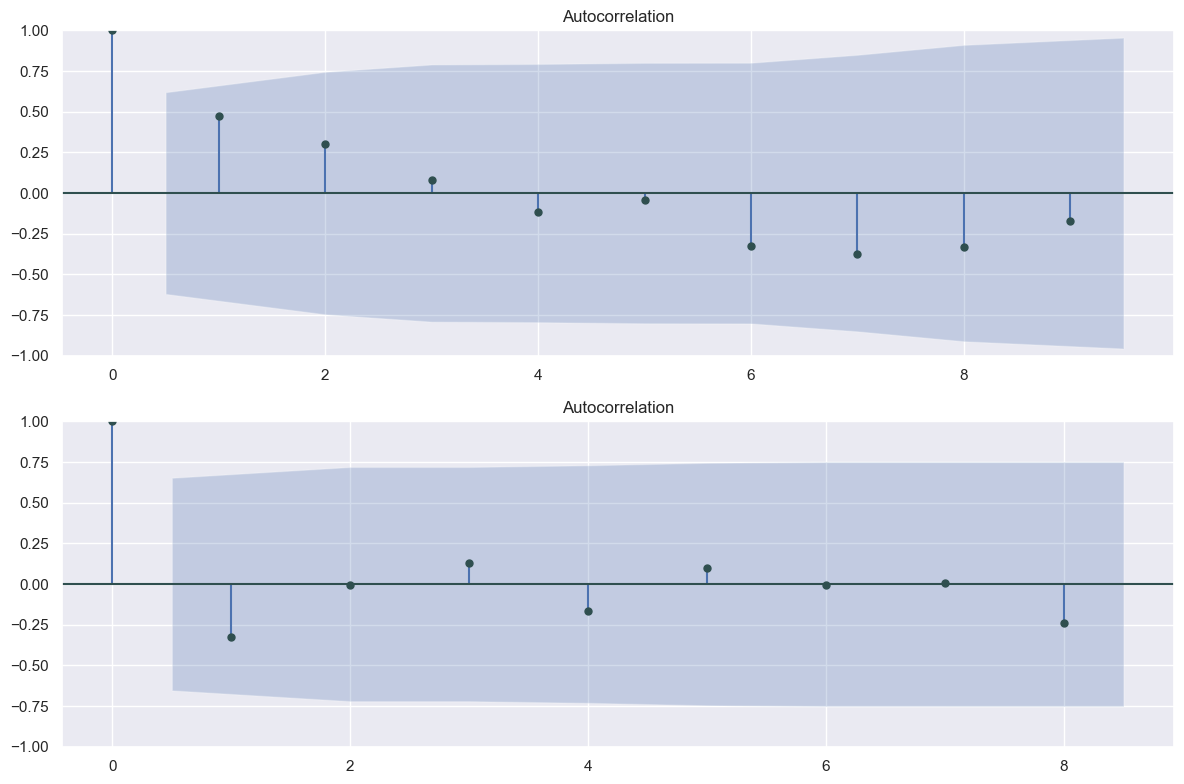

In [37]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
plot_acf(df_global, ax=plt.gca(),color='darkslategrey')
plt.subplot(2, 1, 2)
plot_acf(df_global_diff, ax=plt.gca(),color='darkslategrey')

plt.tight_layout()
plt.savefig('15.1 acf_global_numeric.png')
plt.show()

c:\Users\marya\anacon\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


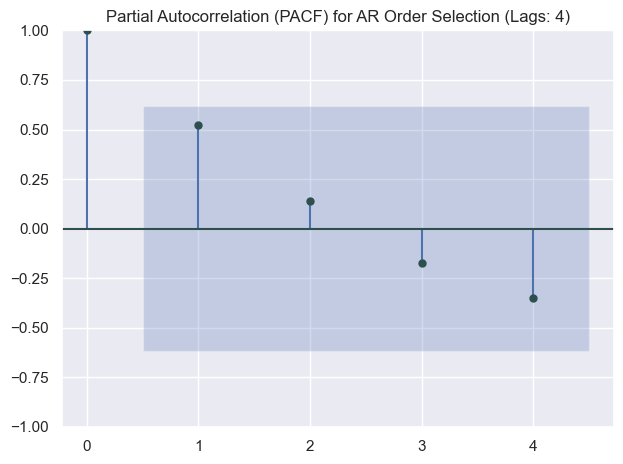

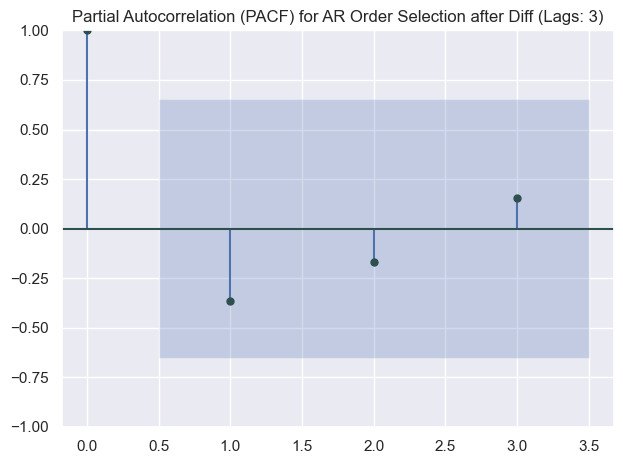

In [38]:
# Calculate the maximum number of lags (50% of the dataset size)
max_lags = len(df_global) // 2 - 1

# Plot PACF with a number of lags that fits within the available data size
plot_pacf(df_global, lags=max_lags,color='darkslategrey')
plt.title(f'Partial Autocorrelation (PACF) for AR Order Selection (Lags: {max_lags})')
plt.tight_layout()
plt.savefig('15.2 Partial Autocorrelation (PACF) for AR Order Selection_global.png')
plt.show()

max_lags = len(df_global_diff) // 2 - 1
plot_pacf(df_global_diff, lags=max_lags,color='darkslategrey')
plt.title(f'Partial Autocorrelation (PACF) for AR Order Selection after Diff (Lags: {max_lags})')
plt.tight_layout()
plt.savefig("15.3 Partial Autocorrelation (PACF) for AR Order Selection_global_diff.png")
plt.show()


##### Fact Value Numeric Low

   Period  FactValueNumericLow
0    2010            16.636952
1    2011            16.881672
2    2012            16.665873
3    2013            16.700529
4    2014            16.247757
Slope:-0.1636
R-squared:0.8558
            FactValueNumericLow
Period                         
2010-01-01            16.636952
2011-01-01            16.881672
2012-01-01            16.665873
2013-01-01            16.700529
2014-01-01            16.247757


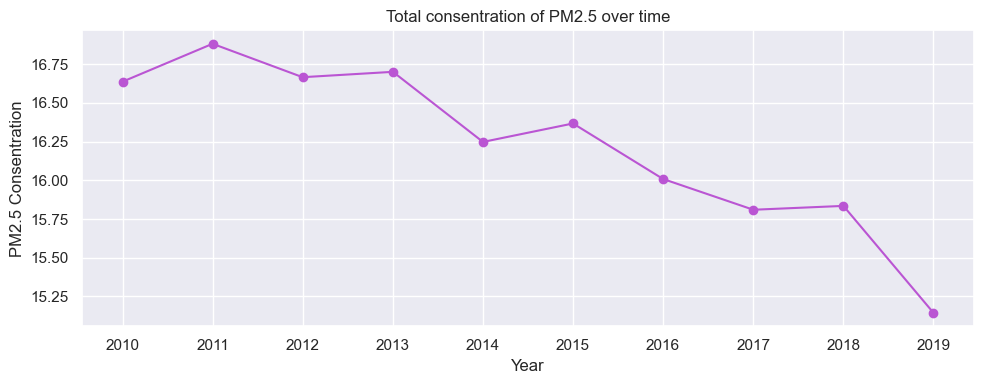

In [39]:
#df_drop.reset_index('Period',inplace=True)
df_low=df_drop[['Period','Location','FactValueNumericLow']]
df_low

df_global_Low=df_low.groupby('Period')['FactValueNumericLow'].mean().reset_index()
print(df_global_Low.head())

slope, intercept,r_value,p_value, std_err=linregress(df_global_Low['Period'],df_global_Low['FactValueNumericLow'])
print(f"Slope:{slope:.4f}")
print(f"R-squared:{r_value**2:.4f}")

df_global_Low['Period']=pd.to_datetime(df_global_Low['Period'],format='%Y')
df_global_Low.set_index('Period',inplace=True)
print(df_global_Low.head())

plt.figure(figsize=(10 ,4))
plt.plot(df_global_Low, marker='o',color='mediumorchid')
plt.title('Total consentration of PM2.5 over time')
plt.xlabel('Year')
plt.ylabel('PM2.5 Consentration')
plt.tight_layout()
plt.grid(True)
plt.savefig('17 pm25_over_time_low.png')
plt.show()

In [40]:
result_low=adfuller(df_global_Low)
print('ADF Statistic: ', result_low[0])
print('P-Value: ', result_low[1])
if result_low[1] > 0.05:
    print('Series is non-stationary and requires differencing')
else:
    print('Series is stationary and is ready for modelling')

ADF Statistic:  1.4166355759607525
P-Value:  0.9971884197102118
Series is non-stationary and requires differencing


In [41]:
df_global_Low_diff=df_global_Low.diff().dropna()
result_low=adfuller(df_global_Low_diff)
print('ADF Statistic: ', result_low[0])
print('P-Value: ', result_low[1])
if result_low[1] > 0.05:
    print('Series is non-stationary and requires differencing')
else:
    print('Series is stationary and is ready for modelling')

ADF Statistic:  -4.638207669907561
P-Value:  0.00010976826563353522
Series is stationary and is ready for modelling


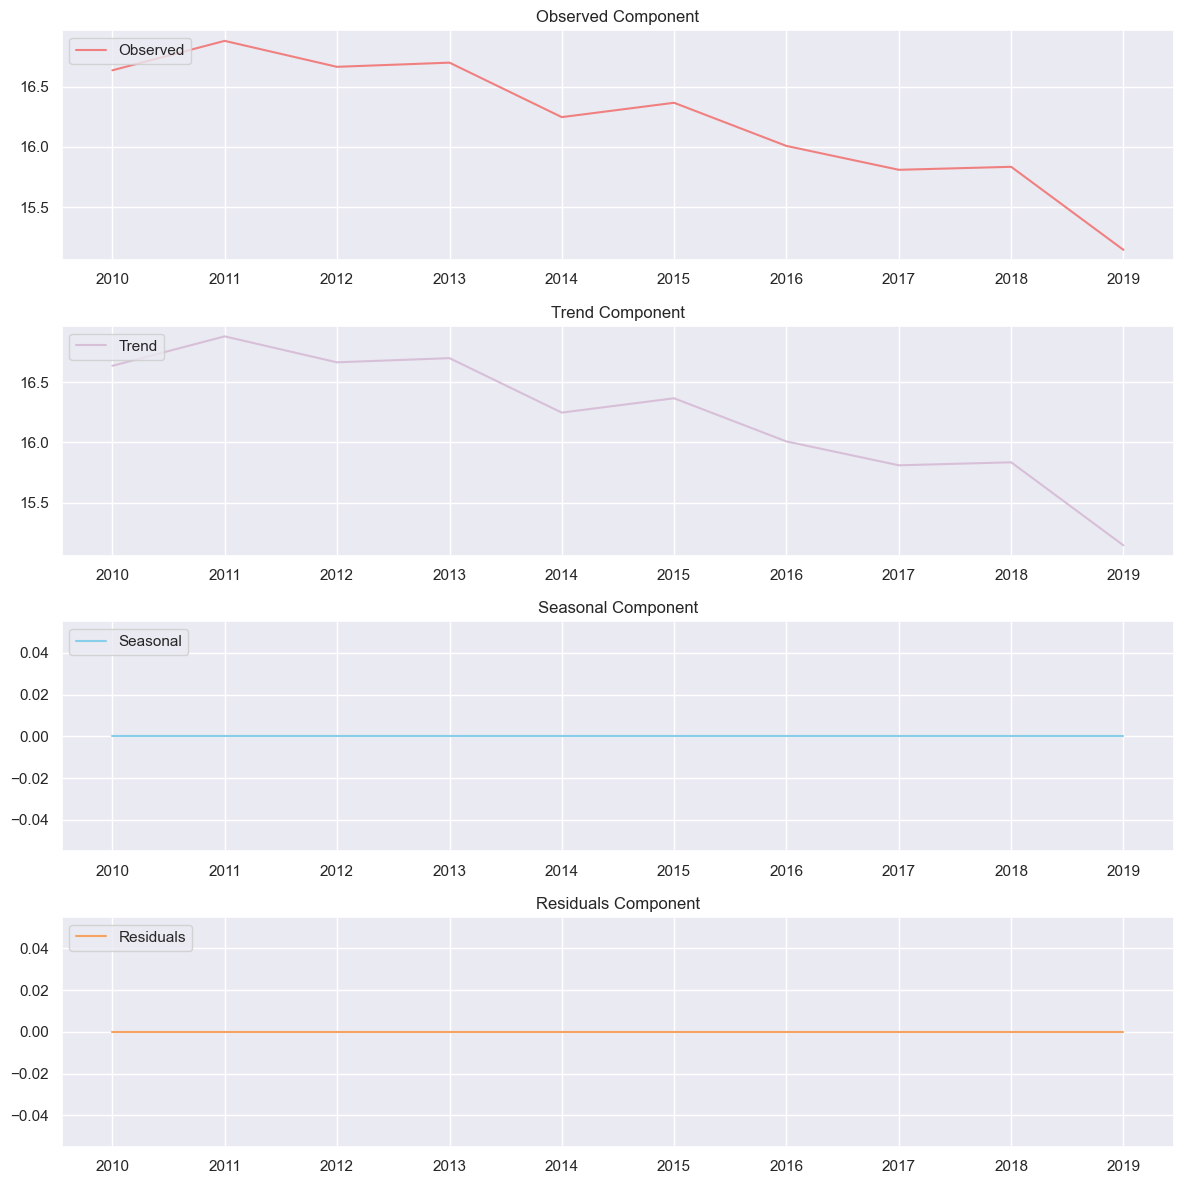

In [42]:
decomposition = seasonal_decompose(df_global_Low, model='additive', period=1)
plt.figure(figsize=(12, 12))
for i, (data, label, color) in enumerate(zip([decomposition.observed, decomposition.trend, decomposition.seasonal, decomposition.resid],
                                             ['Observed', 'Trend', 'Seasonal', 'Residuals'],
                                             ['#F08080', '#D8BFD8', '#87CEEB', '#F4A460'])):
    plt.subplot(4, 1, i + 1)
    plt.plot(data, color=color, label=label)
    plt.title(f'{label} Component')
    plt.legend(loc='upper left')
plt.tight_layout()
plt.savefig('16 seasonal_decomposition_low.png')
plt.show()



##### Using the orignal data before differencing


c:\Users\marya\anacon\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\marya\anacon\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


Mean Squared Error: 95.7510


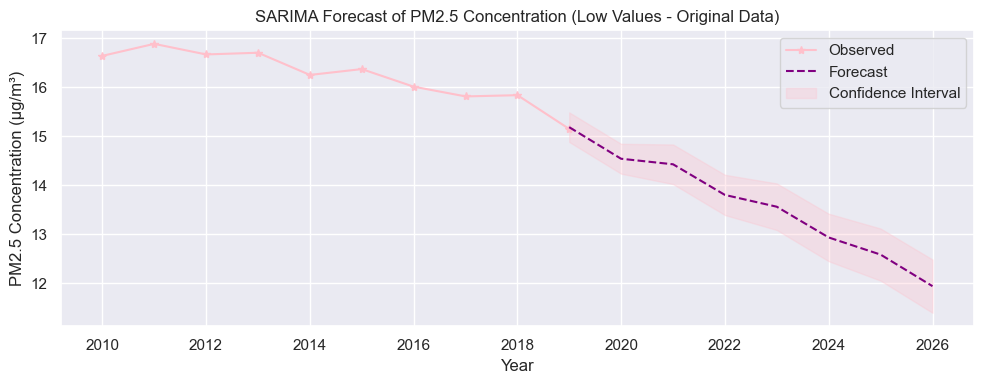

In [43]:
# Fit the SARIMA model without seasonal order
sarima_model = SARIMAX(df_global_Low, order=(1, 1, 0), seasonal_order=(0, 0, 0, 0), trend='t', enforce_stationarity=False, enforce_invertibility=False).fit()
# Forecast the next  years
forecast = sarima_model.get_forecast(steps=8)
forecast_index = pd.date_range(start=df_global_Low.index[-3] + pd.DateOffset(years=1), periods=8, freq='Y')
forecast_values = forecast.predicted_mean
forecast_ci = forecast.conf_int()

actual_values = df_global[-8:]
mse = mean_squared_error(actual_values, forecast_values)
print(f"Mean Squared Error: {mse:.4f}")

# Plot the observed data, forecast, and confidence intervals
plt.figure(figsize=(10, 4))
plt.plot(df_global_Low, label='Observed', color='pink', marker='*')
plt.plot(forecast_index, forecast_values, label='Forecast', color='purple', linestyle='--')
plt.fill_between(forecast_index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='pink', alpha=0.3, label='Confidence Interval')
plt.title('SARIMA Forecast of PM2.5 Concentration (Low Values - Original Data)')
plt.xlabel('Year')
plt.ylabel('PM2.5 Concentration (µg/m³)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('18 sarima_forecast_pm25_low.png')
plt.show()

##### Using the difference table


c:\Users\marya\anacon\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\marya\anacon\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


Mean Squared Error: 589.7785


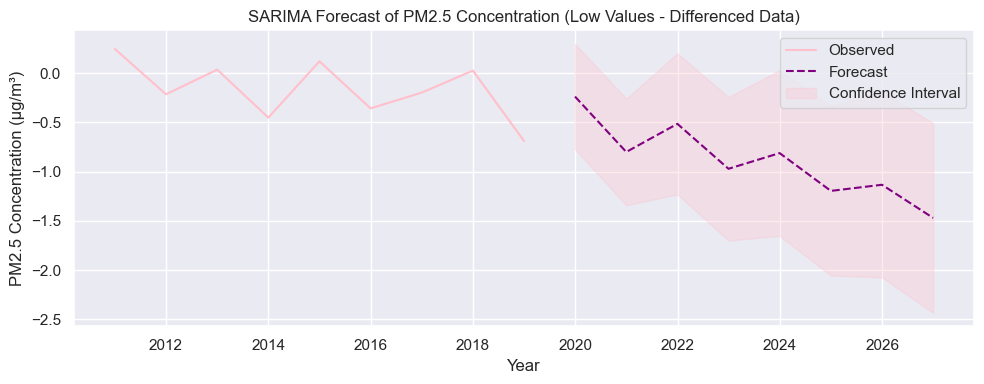

In [44]:
# Fit the SARIMA model without seasonal order
sarima_model = SARIMAX(df_global_Low_diff, order=(1, 1, 0), seasonal_order=(0, 0, 0, 0), trend='t', enforce_stationarity=False, enforce_invertibility=False).fit()
# Forecast the next  years
forecast = sarima_model.get_forecast(steps=8)
forecast_index = pd.date_range(start=df_global_Low_diff.index[-2] + pd.DateOffset(years=1), periods=8, freq='Y')
forecast_values = forecast.predicted_mean
forecast_ci = forecast.conf_int()

actual_values = df_global[-8:]
mse = mean_squared_error(actual_values, forecast_values)
print(f"Mean Squared Error: {mse:.4f}")
# Plot the observed data, forecast, and confidence intervals
plt.figure(figsize=(10, 4))
plt.plot(df_global_Low_diff, label='Observed', color='pink')
plt.plot(forecast_index, forecast_values, label='Forecast', color='purple', linestyle='--')
plt.fill_between(forecast_index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='pink', alpha=0.3, label='Confidence Interval')
plt.title('SARIMA Forecast of PM2.5 Concentration (Low Values - Differenced Data)')
plt.xlabel('Year')
plt.ylabel('PM2.5 Concentration (µg/m³)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('19 sarima_forecast_pm25_low_diff.png')
plt.show()


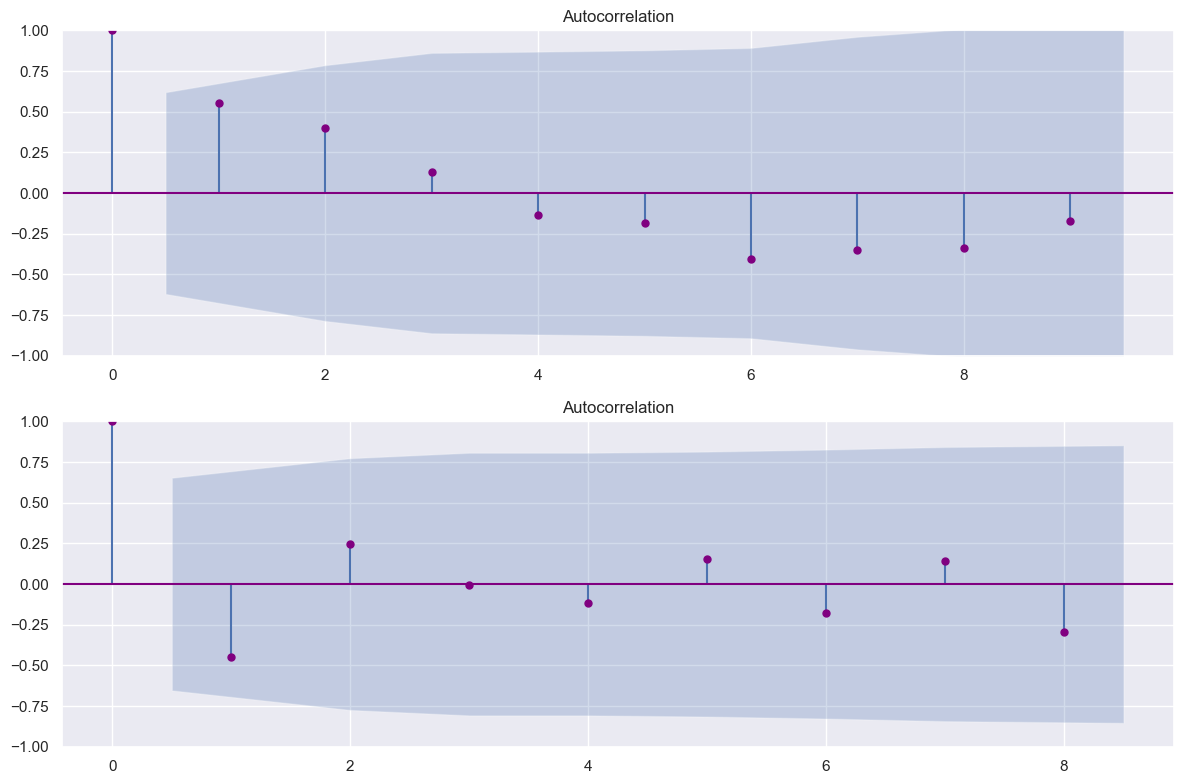

In [45]:
plt.figure(figsize=(12,8))
plt.subplot(2, 1, 1)
plot_acf(df_global_Low, ax=plt.gca(),color='purple')
plt.subplot(2, 1, 2)
plot_acf(df_global_Low_diff, ax=plt.gca(),color='purple')

plt.tight_layout()
plt.savefig('19.1 acf_global_Low.png')
plt.show()

c:\Users\marya\anacon\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


<Figure size 1200x400 with 0 Axes>

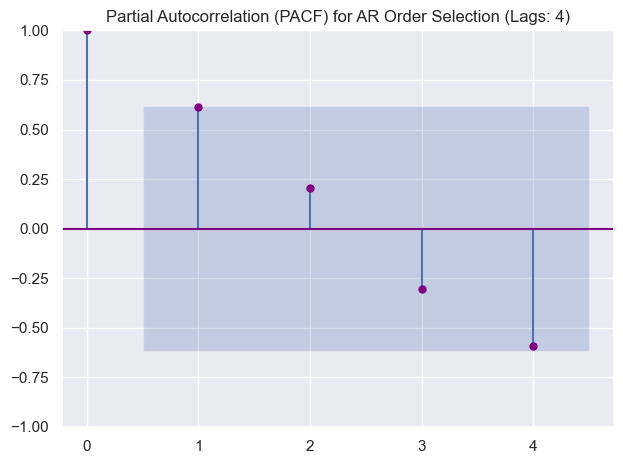

<Figure size 1200x400 with 0 Axes>

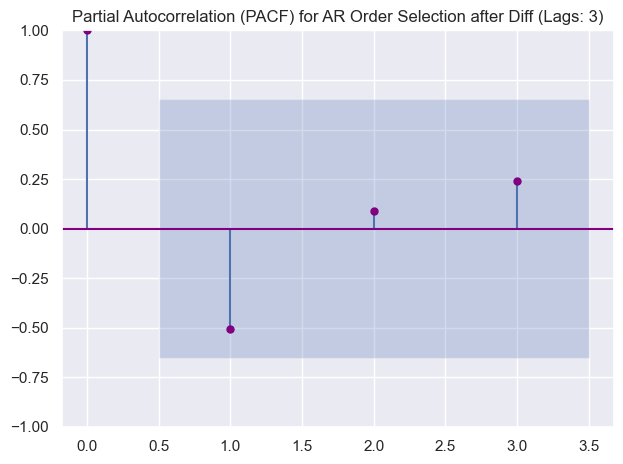

In [46]:
max_lags = len(df_global_Low) // 2 - 1
plt.figure(figsize=(12 ,4))
plot_pacf(df_global_Low, lags=max_lags,color='purple')
plt.title(f'Partial Autocorrelation (PACF) for AR Order Selection (Lags: {max_lags})')
plt.tight_layout()
plt.savefig('19.2 Partial Autocorrelation (PACF) for AR Order Selection_Low.png')
plt.show()

max_lags = len(df_global_Low_diff) // 2 - 1
plt.figure(figsize=(12 ,4))
plot_pacf(df_global_Low_diff, lags=max_lags,color='purple')
plt.title(f'Partial Autocorrelation (PACF) for AR Order Selection after Diff (Lags: {max_lags})')
plt.tight_layout()
plt.savefig('19.3 Partial Autocorrelation (PACF) for AR Order Selection_low_diff.png')
plt.show()

##### High Fact Value Numeric

In [47]:
df_high=df_drop[['Period','Location','FactValueNumericLow']]
df_high.head()

,Period,Location,FactValueNumericLow
0,2019,Kenya,6.29
1,2019,Trinidad and Tobago,7.44
2,2019,United Kingdom of Great Britain and Northern I...,9.73
3,2019,Grenada,7.07
4,2019,Brazil,8.23


In [48]:
df_global_high=df_drop.groupby('Period')['FactValueNumericHigh'].mean().reset_index()
df_global_high

,Period,FactValueNumericHigh
0,2010,35.882741
1,2011,36.365143
2,2012,36.396307
3,2013,35.657312
4,2014,34.853989
5,2015,36.088021
6,2016,35.625852
7,2017,35.154053
8,2018,35.005206
9,2019,33.725608


Slope:-0.2061
R-squared:0.5832
            FactValueNumericHigh
Period                          
2010-01-01             35.882741
2011-01-01             36.365143
2012-01-01             36.396307
2013-01-01             35.657312
2014-01-01             34.853989


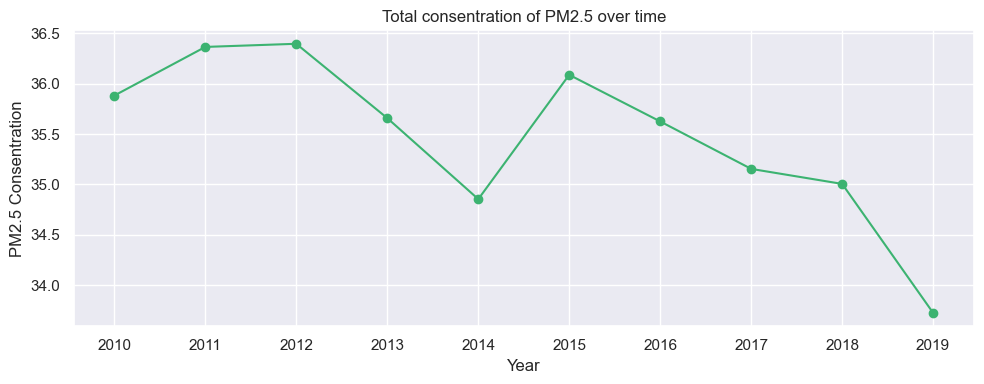

In [49]:
slope, intercept,r_value,p_value, std_err=linregress(df_global_high['Period'],df_global_high['FactValueNumericHigh'])
print(f"Slope:{slope:.4f}")
print(f"R-squared:{r_value**2:.4f}")

df_global_high['Period']=pd.to_datetime(df_global_high['Period'],format='%Y')
df_global_high.set_index('Period',inplace=True)
print(df_global_high.head())

plt.figure(figsize=(10 ,4))
plt.plot(df_global_high, marker='o',color='mediumseagreen')
plt.title('Total consentration of PM2.5 over time')
plt.xlabel('Year')
plt.ylabel('PM2.5 Consentration')
plt.grid(True)
plt.tight_layout()
plt.savefig('21 pm25_over_time_high.png')
plt.show()

In [50]:
result_high=adfuller(df_global_high)
print('ADF Statistic: ', result_high[0])
print('P-Value: ', result_high[1])
if result_high[1] > 0.05:
    print('Series is non-stationary and requires differencing')
else:
    print('Series is stationary and is ready for modelling')

ADF Statistic:  -0.5134729171321732
P-Value:  0.8893604231016481
Series is non-stationary and requires differencing


In [51]:
df_global_high_diff= df_global_high.diff().dropna()
result_high_diff=adfuller(df_global_high_diff)
print('ADF Statistic: ', result_high_diff[0])
print('P-Value: ', result_high_diff[1])
if result_high_diff[1] > 0.05:
    print('Series is non-stationary and requires differencing')
else:
    print('Series is stationary and is ready for modelling')

ADF Statistic:  -2.8471857000533123
P-Value:  0.05184331526263611
Series is non-stationary and requires differencing


In [52]:
df_global_high_diff_2= df_global_high_diff.diff().dropna()
result_high_diff_=adfuller(df_global_high_diff_2)
print('ADF Statistic: ', result_high_diff_[0])
print('P-Value: ', result_high_diff_[1])
if result_high_diff_[1] > 0.05:
    print('Series is non-stationary and requires differencing')
else:
    print('Series is stationary and is ready for modelling')

ADF Statistic:  -2.936619326087772
P-Value:  0.04125238571663481
Series is stationary and is ready for modelling


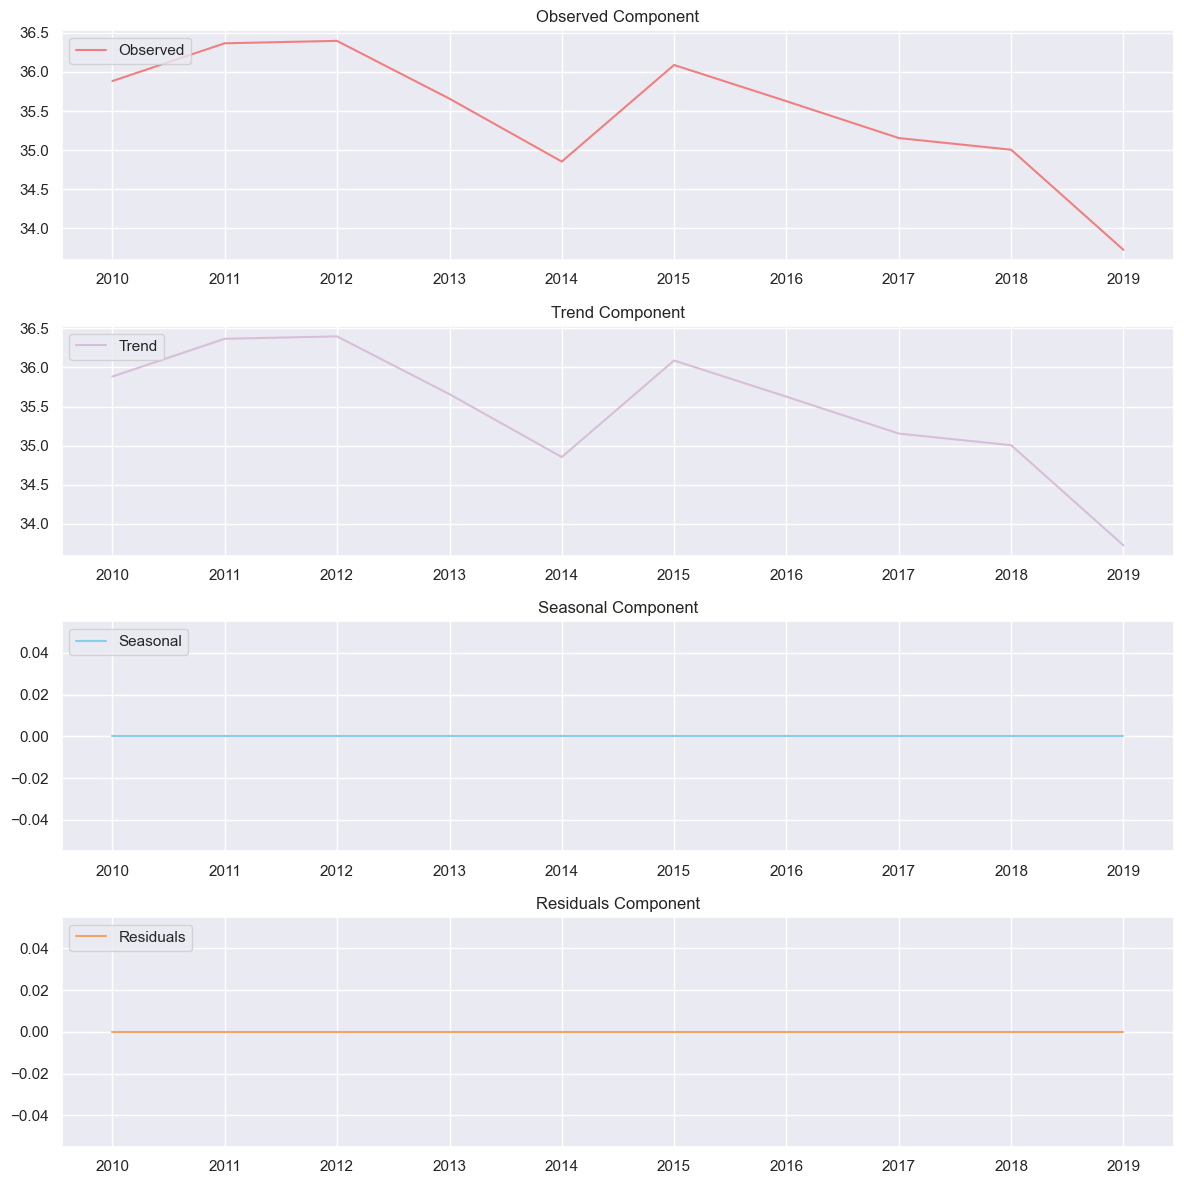

In [53]:
decomposition = seasonal_decompose(df_global_high, model='additive', period=1)
plt.figure(figsize=(12, 12))
for i, (data, label, color) in enumerate(zip([decomposition.observed, decomposition.trend, decomposition.seasonal, decomposition.resid],
                                             ['Observed', 'Trend', 'Seasonal', 'Residuals'],
                                             ['#F08080', '#D8BFD8', '#87CEEB', '#F4A460'])):
    plt.subplot(4, 1, i + 1)
    plt.plot(data, color=color, label=label)
    plt.title(f'{label} Component')
    plt.legend(loc='upper left')
plt.tight_layout()
plt.savefig('20 seasonal_decomposition_high.png')
plt.show()



c:\Users\marya\anacon\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\marya\anacon\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


Mean Squared Error: 56.8507


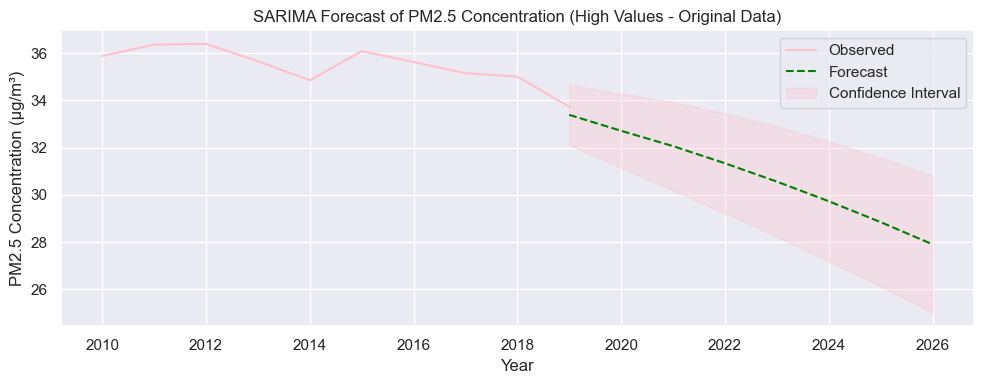

In [54]:
# Fit the SARIMA model without seasonal order
sarima_model = SARIMAX(df_global_high, order=(1, 1, 0), seasonal_order=(0, 0, 0, 0), trend='t', enforce_stationarity=False, enforce_invertibility=False).fit()
# Forecast the next  years
forecast = sarima_model.get_forecast(steps=8)
forecast_index = pd.date_range(start=df_global_high.index[-3] + pd.DateOffset(years=1), periods=8, freq='Y')
forecast_values = forecast.predicted_mean
forecast_ci = forecast.conf_int()

actual_values = df_global[-8:]
mse = mean_squared_error(actual_values, forecast_values)
print(f"Mean Squared Error: {mse:.4f}")

# Plot the observed data, forecast, and confidence intervals
plt.figure(figsize=(10, 4))
plt.plot(df_global_high, label='Observed', color='pink')
plt.plot(forecast_index, forecast_values, label='Forecast', color='green', linestyle='--')
plt.fill_between(forecast_index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='pink', alpha=0.3, label='Confidence Interval')
plt.title('SARIMA Forecast of PM2.5 Concentration (High Values - Original Data)')
plt.xlabel('Year')
plt.ylabel('PM2.5 Concentration (µg/m³)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('22 sarima_forecast_pm25_high.png')
plt.show()


##### Using the 1st difference table

c:\Users\marya\anacon\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\marya\anacon\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


Mean Squared Error: 678.7880


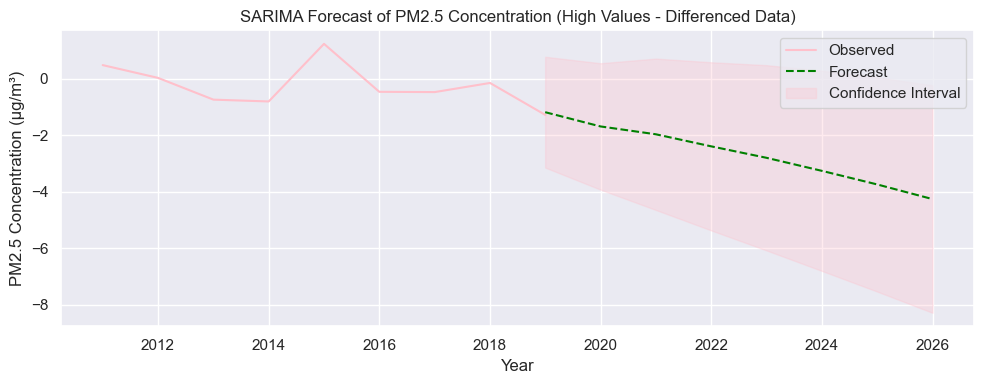

In [55]:
# Fit the SARIMA model without seasonal order
sarima_model = SARIMAX(df_global_high_diff, order=(1, 1, 0), seasonal_order=(0, 0, 0, 0), trend='t', enforce_stationarity=False, enforce_invertibility=False).fit()
# Forecast the next  years
forecast = sarima_model.get_forecast(steps=8)
forecast_index = pd.date_range(start=df_global_high_diff.index[-3] + pd.DateOffset(years=1), periods=8, freq='Y')
forecast_values = forecast.predicted_mean
forecast_ci = forecast.conf_int()

actual_values = df_global[-8:]
mse = mean_squared_error(actual_values, forecast_values)
print(f"Mean Squared Error: {mse:.4f}")

# Plot the observed data, forecast, and confidence intervals
plt.figure(figsize=(10, 4))
plt.plot(df_global_high_diff, label='Observed', color='pink')
plt.plot(forecast_index, forecast_values, label='Forecast', color='green', linestyle='--')
plt.fill_between(forecast_index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='pink', alpha=0.3, label='Confidence Interval')
plt.title('SARIMA Forecast of PM2.5 Concentration (High Values - Differenced Data)')
plt.xlabel('Year')
plt.ylabel('PM2.5 Concentration (µg/m³)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('23 sarima_forecast_pm25_high_1st_diff.png')
plt.show()


##### Using the 2nd difference table

c:\Users\marya\anacon\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\marya\anacon\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


Mean Squared Error: 629.5329


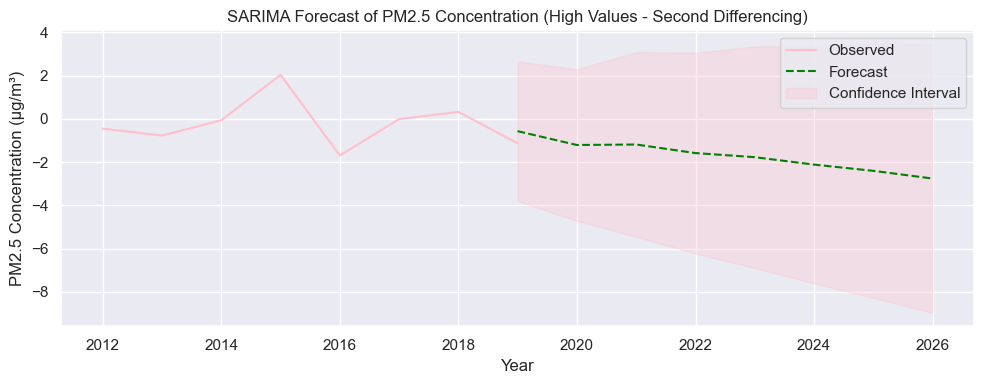

In [56]:
# Fit the SARIMA model without seasonal order
sarima_model = SARIMAX(df_global_high_diff_2, order=(1, 1, 0), seasonal_order=(0, 0, 0, 0), trend='t', enforce_stationarity=False, enforce_invertibility=False).fit()
# Forecast the next  years
forecast = sarima_model.get_forecast(steps=8)
forecast_index = pd.date_range(start=df_global_high_diff_2.index[-3] + pd.DateOffset(years=1), periods=8, freq='Y')
forecast_values = forecast.predicted_mean
forecast_ci = forecast.conf_int()

actual_values = df_global[-8:]
mse = mean_squared_error(actual_values, forecast_values)
print(f"Mean Squared Error: {mse:.4f}")

# Plot the observed data, forecast, and confidence intervals
plt.figure(figsize=(10, 4))
plt.plot(df_global_high_diff_2, label='Observed', color='pink')
plt.plot(forecast_index, forecast_values, label='Forecast', color='green', linestyle='--')
plt.fill_between(forecast_index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='pink', alpha=0.3, label='Confidence Interval')
plt.title('SARIMA Forecast of PM2.5 Concentration (High Values - Second Differencing)')
plt.xlabel('Year')
plt.ylabel('PM2.5 Concentration (µg/m³)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('24 sarima_forecast_pm25_high_2nd_diff.png')
plt.show()



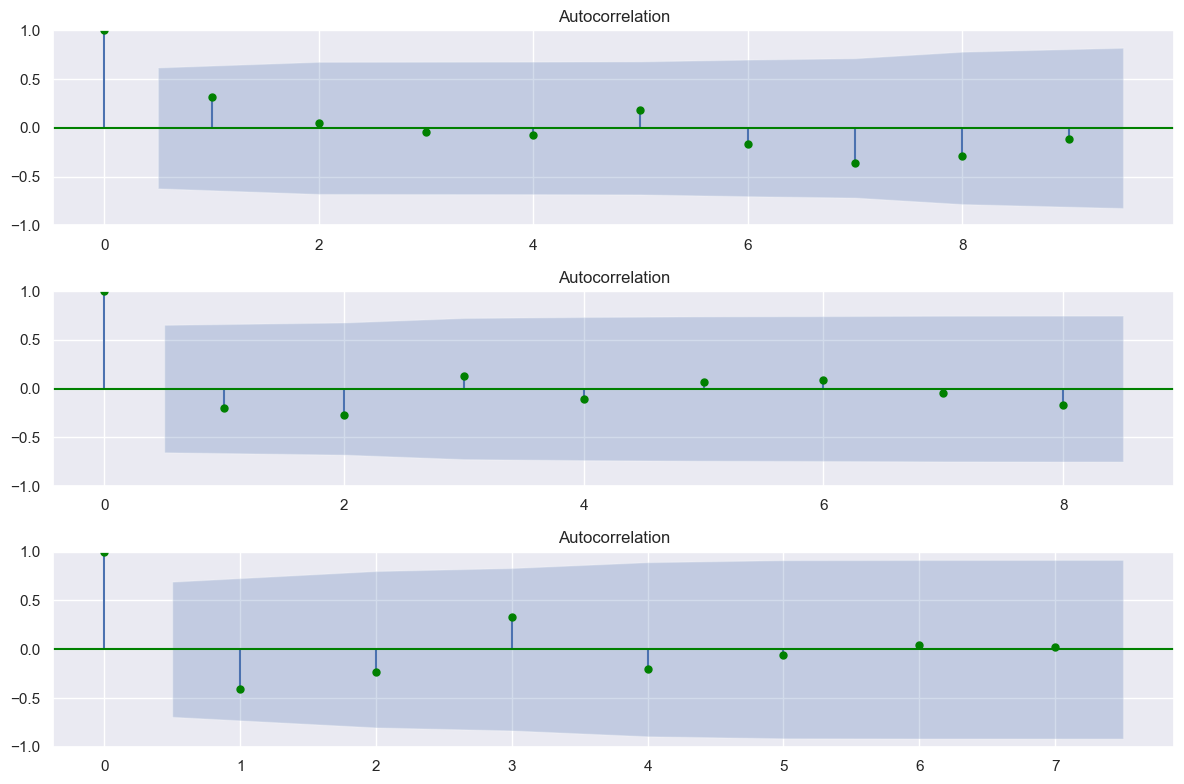

In [57]:
plt.figure(figsize=(12,8))
plt.subplot(3, 1, 1)
plot_acf(df_global_high, ax=plt.gca(),color='green')
plt.subplot(3, 1, 2)
plot_acf(df_global_high_diff, ax=plt.gca(),color='green')
plt.subplot(3, 1, 3)
plot_acf(df_global_high_diff_2, ax=plt.gca(),color='green')
plt.tight_layout()
plt.savefig('24.1 acf_global_high.png')
plt.show()

c:\Users\marya\anacon\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


<Figure size 1000x600 with 0 Axes>

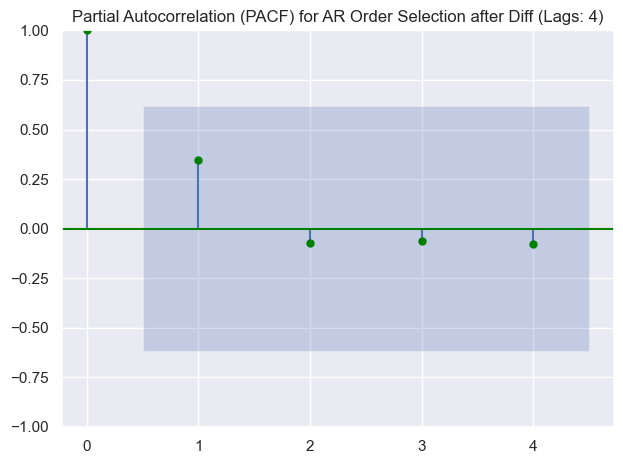

<Figure size 1000x600 with 0 Axes>

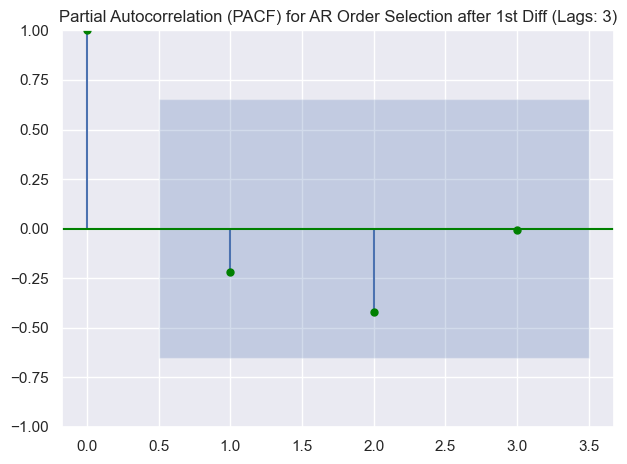

<Figure size 1000x600 with 0 Axes>

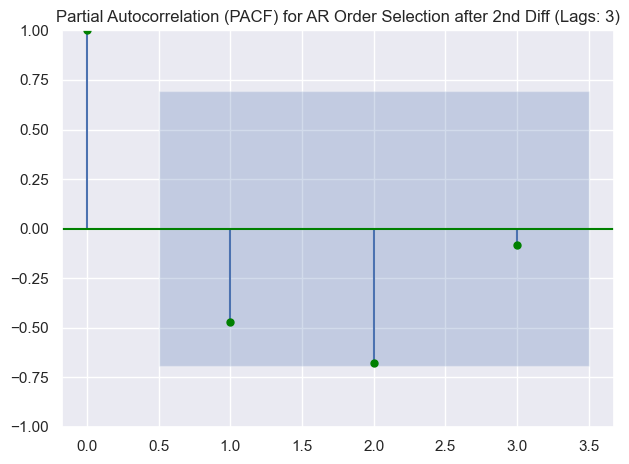

In [58]:
max_lags = len(df_global_high) // 2 - 1
plt.figure(figsize=(10 ,6))
plot_pacf(df_global_high, lags=max_lags,color='green')
plt.title(f'Partial Autocorrelation (PACF) for AR Order Selection after Diff (Lags: {max_lags})')
plt.tight_layout()
plt.savefig('24.2 Partial Autocorrelation (PACF) for AR Order Selection_high.png')
plt.show()
max_lags = len(df_global_high_diff) // 2 - 1
plt.figure(figsize=(10 ,6))
plot_pacf(df_global_high_diff, lags=max_lags,color='green')
plt.title(f'Partial Autocorrelation (PACF) for AR Order Selection after 1st Diff (Lags: {max_lags})')
plt.tight_layout()
plt.savefig('24.3 Partial Autocorrelation (PACF) for AR Order Selection_high_1stdiff.png')
plt.show()
max_lags = len(df_global_high_diff_2) // 2 - 1
plt.figure(figsize=(10 ,6))
plot_pacf(df_global_high_diff_2, lags=max_lags,color='green')
plt.title(f'Partial Autocorrelation (PACF) for AR Order Selection after 2nd Diff (Lags: {max_lags})')
plt.tight_layout()
plt.savefig('24.4 Partial Autocorrelation (PACF) for AR Order Selection_hogh_2nddiff.png')
plt.show()

#### Plot PDF

In [ ]:
# Folder containing your images
image_folder = 'Pictures'

# Create a PDF object
pdf = FPDF()

# List all PNG images and sort them naturally
images = [img for img in os.listdir(image_folder) if img.endswith('.png')]
images = natsorted(images)  # Natural sorting (e.g., 0.1, 1, 2, 19, 19.1, etc.)

# A4 dimensions in mm
page_width = 210
page_height = 297
margin = 10
usable_width = page_width - 2 * margin
usable_height = page_height - 2 * margin
current_x = margin
current_y = margin
line_height = 0  # Keep track of the tallest image in the row for consistent spacing

# Add a new page to start
pdf.add_page()

# Add images to the page
for img in images:
    # Path to the image
    image_path = os.path.join(image_folder, img)
    
    # Open the image to get its dimensions
    with Image.open(image_path) as img_obj:
        img_width, img_height = img_obj.size

    # Calculate the aspect ratio
    aspect_ratio = img_width / img_height

    # Scale image to fit within a reasonable size while keeping aspect ratio
    scaled_width = usable_width / 5  # Divide the page width by the number of images per row 
    scaled_height = scaled_width / aspect_ratio

    # Check if the image fits within the current row
    if current_x + scaled_width > page_width - margin:
        # Move to the next row if not enough space
        current_x = margin  # Reset X position to the start of the next row
        current_y += line_height + 5  # Move down by the tallest image in the row + spacing
        line_height = 0  # Reset the line height

    # Check if the next row fits on the current page, add a new page if needed
    if current_y + scaled_height > page_height - margin:
        pdf.add_page()
        current_x = margin
        current_y = margin
        line_height = 0

    # Add the image to the PDF
    pdf.image(image_path, x=current_x, y=current_y, w=scaled_width, h=scaled_height)
    
    # Update the X position for the next image in the same row
    current_x += scaled_width + 5 # Add spacing between images

    # Update the line height if the current image is taller
    line_height = max(line_height, scaled_height)

# Save the PDF
pdf_output_path = 'Air_Quality_Images_Multi_Side_by_Side.pdf'
pdf.output(pdf_output_path)

print(f"PDF saved at {pdf_output_path}")


PDF saved at Air_Quality_Images_Multi_Side_by_Side.pdf
